In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Logistic Function

$$f(x) = \frac{1}{1 + exp(-x)}$$

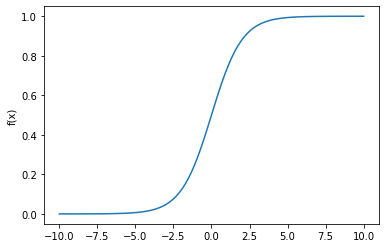

In [2]:
xs = np.linspace(-10, 10, 100)
plt.plot(xs, 1 / (1 + np.exp(-xs)))
plt.ylabel('f(x)')
plt.show()

## Multivariate Normal Distribution

$$ \mathcal{N}(\mu, \Sigma) \sim \frac{1}{(2\pi)^\frac{d}{2}|\Sigma|^\frac{1}{2}} \exp\left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)\right) $$

$$\mathbb{E}[X] = \mu $$
$$\Sigma_{i,j} = \mathbb{E}[(X_i - \mu_i)(X_j - \mu_j)] = \text{Cov}(X_i, X_j) $$

## Logistic Decision Boundary from Gaussians with Same Covariance
Suppose we have data points $x_i \in \mathbb{R}^2$ belonging to one of two classes $y_i \in \{0, 1\}$ with prior distribution $P(y_i = 1) = \pi$, and conditional distributions $P(x_i | y_i = 0) = \mathcal{N}(\mu_0, \Sigma)$ and $P(x_i | y_i = 1) = \mathcal{N}(\mu_1, \Sigma)$. The ratio of the posterior likelihoods is given as follows.


$$
\begin{align}
\frac{P(y_i = 1 | x_i)}{P(y_i = 0 | x_i)}
    &= \frac{P(x_i | y_i = 1)P(y_i = 1)}{P(x_i | y_i = 0)P(y_i = 0)} \\
    &= \frac{\frac{1}{\sqrt{2}\pi|\Sigma|^\frac{1}{2}} \exp\left(-\frac{1}{2} (x_i - \mu_1)^T \Sigma^{-1} (x_i - \mu_1)\right)}{\frac{1}{\sqrt{2}\pi|\Sigma|^\frac{1}{2}} \exp\left(-\frac{1}{2} (x_i - \mu_0)^T \Sigma^{-1} (x_i - \mu_0)\right)} \frac{\pi}{1 - \pi} \\
    &= \frac{\exp\left(-\frac{1}{2} \left[ x_i^T\Sigma^{-1}x_i - 2\mu_1^T \Sigma^{-1}x_i + \mu_1^T \Sigma^{-1}\mu_1\right]\right)}{\exp\left(-\frac{1}{2} \left[ x_i^T\Sigma^{-1}x_i - 2\mu_0^T \Sigma^{-1}x_i + \mu_0^T \Sigma^{-1}\mu_0\right]\right)} \frac{\pi}{1 - \pi} \\
    &= \exp\left(-\frac{1}{2} \left[- 2(\mu_1 - \mu_0)^T\Sigma^{-1}x_i + \mu_1^T \Sigma^{-1}\mu_1 - \mu_0 \Sigma^{-1}\mu_0\right] + \log \frac{\pi}{1 - \pi}\right) \\
    &= \exp\left((\mu_1 - \mu_0)^T\Sigma^{-1}x_i - \frac{1}{2}\left[\mu_1^T \Sigma^{-1}\mu_1 - \mu_0 \Sigma^{-1}\mu_0\right] + \log \frac{\pi}{1 - \pi}\right) \\
    &= \exp(\beta^Tx_i + \beta_0)
\end{align}$$


where $\beta = (\mu_1 - \mu_0)^T\Sigma^{-1}$ and $\beta_0 = - \frac{1}{2}\left[\mu_1^T \Sigma^{-1}\mu_1 - \mu_0 \Sigma^{-1}\mu_0\right] + \log \frac{\pi}{1 - \pi} $.


We can take the $\log$ to show that the log odds are linear, similar to the logistic regression setup.

$$
\begin{align}
\log \frac{P(y_i = 1 | x_i)}{P(y_i = 0 | x_i)}
    &= (\mu_1 - \mu_0)^T\Sigma^{-1}x_i - \frac{1}{2}\left[\mu_1^T \Sigma^{-1}\mu_1 - \mu_0 \Sigma^{-1}\mu_0\right] + \log \frac{\pi}{1 - \pi} \\
    &= \beta^Tx_i + \beta_0
\end{align}
$$



Now, solve for $P(y_i = 1 | x_i)$ by applying Bayes' rule.
$$
\begin{align}
    P(y_i = 1 | x_i) &= \frac{P(x_i | y_i = 1)P(y_i = 1)}{P(x_i)} \\
                     &= \frac{P(x_i | y_i = 1)P(y_i = 1)}{P(x_i | y_i = 1)P(y_i = 0) + P(x_i | y_i = 1)P(y_i = 1)} \\
                     &= \frac{1}{1 + \dfrac{P(x_i | y_i = 0)}{P(x_i | y_i = 1)}\dfrac{P(y_i = 0)}{P(y_i = 1)}} \\
                     &= \frac{1}{1 + \exp\left(-\left[(\mu_1 - \mu_0)^T\Sigma^{-1}x_i - \frac{1}{2}\left[\mu_1^T \Sigma^{-1}\mu_1 - \mu_0 \Sigma^{-1}\mu_0\right] + \log \frac{\pi}{1 - \pi}\right]\right)} \\
                     &= \frac{1}{1 + \exp(-\beta^Tx_i - \beta_0)} \\
\end{align}
$$

In [3]:
mu_0 = np.array([1, 1])
mu_1 = np.array([3, -1])
cov_0 = np.array([[2, 1],
                  [1, 2]])
cov_1 = cov_0

mvn_pdf = lambda x, mu, cov: (1. / (np.pi * np.linalg.det(cov)**0.5)) * \
                             np.exp(-0.5*np.sum((x-mu).dot(np.linalg.inv(cov)) * (x-mu), axis=-1))

np.random.seed(10)
N = 100
xs_0 = np.random.multivariate_normal(mu_0, cov_0, N)
xs_1 = np.random.multivariate_normal(mu_1, cov_1, N)

In [4]:
beta = np.dot(mu_1 - mu_0, np.linalg.inv(cov_0))
beta_0 = -0.5 * (mu_1.dot(np.linalg.inv(cov_0)).dot(mu_1) -
                 mu_0.dot(np.linalg.inv(cov_0)).dot(mu_0))

In [5]:
x_0 = np.array([-beta_0 / beta[0], 0])
slope = beta[1] / beta[0]
decision_boundary_points = x_0 + np.linspace(-4, 4, 10)[:, None] * np.array([1, -1/slope])

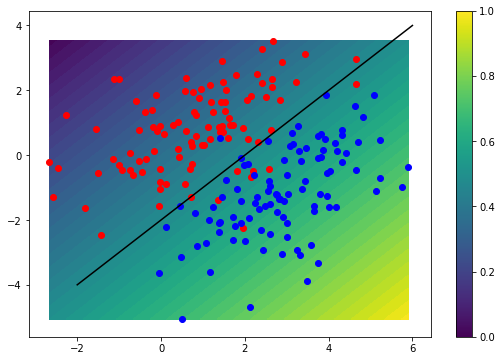

In [6]:
min_x, min_y = np.min(np.vstack([xs_0, xs_1]), axis=0)
max_x, max_y = np.max(np.vstack([xs_0, xs_1]), axis=0)
xs, ys = np.meshgrid(np.linspace(min_x, max_x), np.linspace(min_y, max_y))
log_odds = np.log(mvn_pdf(np.stack([xs, ys], -1), mu_1, cov_1) / mvn_pdf(np.stack([xs, ys], -1), mu_0, cov_0))
fig, ax = plt.subplots(figsize=(9, 6))
plt.contourf(xs, ys, log_odds, 50)
plt.scatter(xs_0[:, 0], xs_0[:, 1], color='r')
plt.scatter(xs_1[:, 0], xs_1[:, 1], color='b')
plt.plot(decision_boundary_points[:, 0],
         decision_boundary_points[:, 1],
         color='k')
plt.colorbar()

## Multiclass Classification
Suppose that we would like to classify $x \in \mathbb{R}^d$ into one of $K$ classes. We can apply the same procedure as the binary case where we model the log odds using a linear function. In particular, model the log odds relative to class $K$ as follows.

$$\log \frac{P(y=1|x)}{P(y=K|x)} = w_1^Tx \\
  \log \frac{P(y=2|x)}{P(y=K|x)} = w_2^Tx  \\
        \vdots \\
  \log \frac{P(y=K-1|x)}{P(y=K|x)} = w_{K-1}^Tx $$

Use the fact that the probabilities sum to 1 to derive an expression for $P(y=K|x)$.

$$
\begin{align}
P(y=K|x) + \sum_k^{K-1} P(y=k|x) &= 1 \\
P(y=K|x) + P(y=K|x)\left[\sum_k^{K-1} \exp(w_k^Tx)\right] &= 1 \\
P(y=K|x)(1 + \sum_k^{K-1} \exp(w_k^Tx)) &= 1 \\
P(y=K|x) = \dfrac{1}{1 + \sum_k^{K-1} \exp(w_k^Tx)} \\
\end{align}
$$

Now, use the newly derived expression to solve for $P(y=k|x)$, for $k \in \{1,2,...,K-1\}$.

$$
  P(y=1|x) = \frac{\exp(w_1^Tx)}{1 + \sum_k^{K-1} \exp(w_k^Tx)} \\
  P(y=2|x) = \frac{\exp(w_2^Tx)}{1 + \sum_k^{K-1} \exp(w_k^Tx)}  \\
        \vdots \\
  P(y=K-1|x) = \frac{\exp(w_{K-1}^Tx)}{1 + \sum_k^{K-1} \exp(w_k^Tx)} $$

In [7]:
np.random.seed(10)
# Generate data for multiclass logistic regression.
mu_0 = np.array([-1, -0.5])
mu_1 = np.array([4, -1])
mu_2 = np.array([2, 4])
cov = np.array([[0.5, 0],
                [0, 0.5]])

N = 100
xs_0 = np.random.multivariate_normal(mu_0, cov, N)
xs_1 = np.random.multivariate_normal(mu_1, cov, N)
xs_2 = np.random.multivariate_normal(mu_2, cov, N)
X = np.vstack([xs_0, xs_1, xs_2])
y = np.hstack([i * np.ones(N, dtype=np.int32) for i in range(3)])

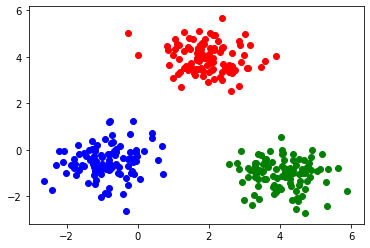

In [8]:
plt.scatter(xs_0[:, 0], xs_0[:, 1], color='b')
plt.scatter(xs_1[:, 0], xs_1[:, 1], color='g')
plt.scatter(xs_2[:, 0], xs_2[:, 1], color='r')

In [9]:
W = np.array([[ 3.21527733, -0.65669953, -0.74116745],
              [-1.55172283,  1.65967549,  0.46762264],
              [-0.67493746, -0.84195152,  1.69316534]])

No handles with labels found to put in legend.


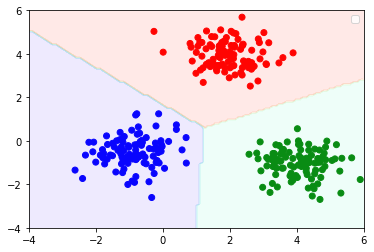

In [10]:
colors = np.array(['b', 'g', 'r'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])

xx, yy = np.meshgrid(np.linspace(-4, 6, 100),
                     np.linspace(-4, 6, 100))
Z = (np.c_[np.ones(100*100), xx.ravel(), yy.ravel()]).dot(W)
Z = np.argmax(Z, axis=-1)
Z = Z.reshape(xx.shape)
out = plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.1)
plt.legend()

## Gradient Descent and Backtracking Line Search
In this part, we will review gradient descent and show how it can be improved using a technique called backtracking line search. As shown in class, standard gradient descent is a fairly intuitive algorithm. Given a function $f(x)$, an initial point $x_0$, and step size $\alpha$, gradient descent performs the update $x_{t+1} = x_t - \alpha f'(x_t)$ until a desired tolerance $\epsilon$ is reached, i.e. $|f(x_t) - f(x_{t+1})| \leq \epsilon$. When applied to convex functions, we are guaranteed that the local minimum found by gradient descent is a global minimum. As a toy example, consider trying to optimize the quadratic function $f(x) = (x - 3)^2$.


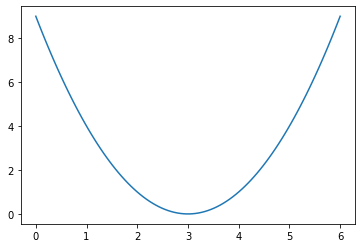

In [11]:
f = lambda x: (x - 3)**2
df = lambda x: 2 * (x - 3)
xs = np.linspace(0, 6, 100)
plt.plot(xs, f(xs))

Starting at $x_0 = 5$, observe that gradient descent with step size $\alpha = 0.1$ arrives fairly close to the minimum of $f$ after 10 iterations. However, notice that while gradient descent made rapid progress in the beginning, it slowed down significantly towards the end as the gradient magnitude decreased. 

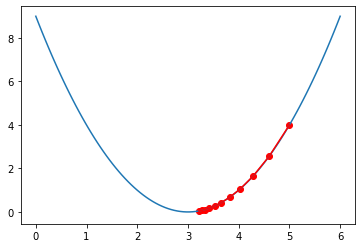

In [12]:
x0 = 5
x_gd = [x0]
for i in range(10):
    x_gd.append(x_gd[-1] - 0.1 * df(x_gd[-1]))
x_gd = np.array(x_gd)
plt.plot(xs, f(xs))
plt.scatter(x_gd, f(x_gd), color='r')
plt.plot(x_gd, f(x_gd), color='r')

While this problem can be mitigated by setting a larger value of $\alpha$, too large an $\alpha$ can cause slow convergence or even cause gradient descent to diverge.

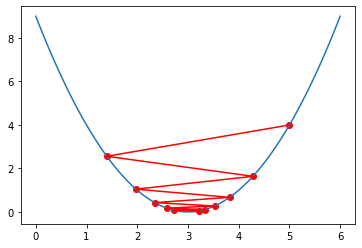

In [13]:
x0 = 5
x_gd = [x0]
for i in range(10):
    x_gd.append(x_gd[-1] - 0.9 * df(x_gd[-1]))
x_gd = np.array(x_gd)
plt.plot(xs, f(xs))
plt.scatter(x_gd, f(x_gd), color='r')
plt.plot(x_gd, f(x_gd), color='r')

Gradient descent with fixed step size has two main problems: First, one must choose $\alpha$. Second, however, even the best fixed $\alpha$ does not necessarily converge as fast as the best iterative first-order method. One way of improving beyond fixed step gradient descent is to use an adaptive learning rate. We will describe a method of doing so known as _backtracking line search_ that we will derive by looking at gradient descent in a different way.

We can view gradient descent as minimizing a local quadratic approximation (based on $f'(x_t)$) around $x_t$ at each step. This approximation (which we will call $g(x)$) is given as follows.
$$
  g(x) = f(x_t) + f'(x_t)(x - x_t) + \frac{1}{2\alpha}(x - x_t)^2
$$
$g(x)$ has three important properties.
1. $g(x_t) = f(x_t)$. $g$ has the same value as $f$ at $x_t$.
2. $g'(x_t) = f'(x_t)$. $g$ has the same gradient as $f$ at $x_t$.
3. $argmin_x g(x) = x_t - \alpha f'(x_t)$. $g$ is minimized at $x = x_t - \alpha f'(x_t)$, which is exactly the update performed by gradient descent.

Below we illustrate that increasing $\alpha$ corresponds to minimizing larger quadratic approximations around $x_t$.

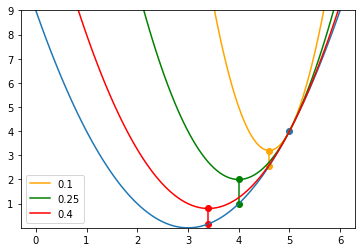

In [14]:
q_approx_f = lambda x, x_0, alpha: f(x_0) + df(x_0) * (x - x_0) + (1. / (2*alpha)) * (x - x_0)**2
plt.plot(xs, f(xs))
colors = ['orange', 'g', 'r']
plt.scatter(x0, f(x0))
for i, alpha in enumerate([0.1, 0.25, 0.4]):
    xt = x0 - alpha*df(x0)
    plt.plot(xs, q_approx_f(xs, x0, alpha), label=alpha, color=colors[i])
    plt.scatter([xt, xt], [f(xt), q_approx_f(xt, x0, alpha)], color=colors[i])
    plt.plot([xt, xt], [f(xt), q_approx_f(xt, x0, alpha)], color=colors[i])
plt.ylim([np.min(f(xs)), np.max(f(xs))])
plt.legend()
plt.show()

Choosing the best step size (at every step) is thus analogous to choosing the "most accurate" quadratic approximation of $f$. Notice that all of the displayed approximations are overestimates of $f$. Setting a much larger value of $\alpha$, however, would result in an huge underestimate. The intuition of backtracking line search follows precisely from this reasoning. We first set a large $\alpha$ such that the approximation is a huge underestimate of $f$. We then "backtrack" by decreasing $\alpha$ exponentially, stopping when we've found $\alpha$ corresponding to the largest underestimate of $f$, and taking a gradient step. Formally, this involves setting $\alpha = \alpha*\beta$ as long as  $f(x_t - \alpha*f'(x_t)) > g(x_t - \alpha*f'(x_t))$ against  at every step $t$. For the set of hyperparameters $\alpha_0 = 0.9$, $\beta = 0.8$, we find that backtracking line search requires 3 iterations to find the largest underestimate.

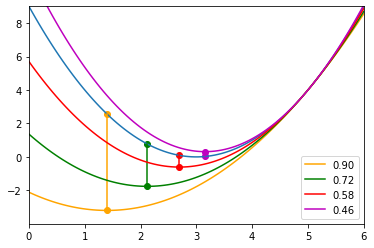

In [15]:
q_approx_f = lambda x, x_0, alpha: f(x_0) + df(x_0) * (x - x_0) + (1. / (2*alpha)) * (x - x_0)**2

plt.plot(xs, f(xs))
colors = ['orange', 'g', 'r', 'm']
step_size = 0.9
xt = x0 - step_size*df(x0)
i = 0
for i in range(4):
    xt = x0 - step_size*df(x0)
    plt.plot(xs, q_approx_f(xs, x0, step_size), label='%0.2f' % step_size, color=colors[i])
    plt.scatter([xt, xt], [f(xt), q_approx_f(xt, x0, step_size)], color=colors[i])
    plt.plot([xt, xt], [f(xt), q_approx_f(xt, x0, step_size)], color=colors[i])
    step_size *= 0.8
    i += 1
plt.xlim([np.min(xs), np.max(xs)])
plt.ylim([np.min(f(xs)) - 4, np.max(f(xs))])
plt.legend()
plt.show()

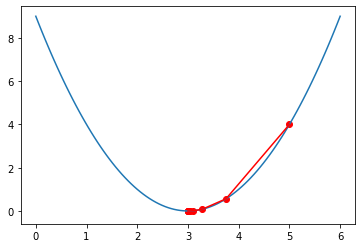

In [16]:
x0 = 5
x_bt = [x0]
for i in range(10):
    xt = x_bt[-1]
    step_size = 5
    grad = df(xt)
    while f(xt - step_size*grad) > (f(xt) - 0.5*step_size*grad**2):
        step_size *= 0.5
    x_bt.append(x_bt[-1] - step_size * df(x_bt[-1]))
x_bt = np.array(x_bt)
plt.plot(xs, f(xs))
plt.scatter(x_bt, f(x_bt), color='r')
plt.plot(x_bt, f(x_bt), color='r')